In [1]:
import numpy as np
import pandas as pd
import pylab as plt
from tqdm.auto import tqdm
from astropy.io import ascii

## 1. See how many spectra (%) can be opened by Astropy

In [2]:
# Read spectra metadata
spectra_info = pd.read_csv(
    "../1. download ALL wise data/wiserep_spectra_combined.csv"
)  # .set_index(' IAU name').to_dict('index')

In [3]:
spectra_info.shape

(54005, 46)

---
### Run later
---

In [3]:
#Loop over all spectra ascii filenames and see how many can be opened
read_success = []
cols = []
n_cols = []
exception = []
wise_ids = []
success_count = 0
total_count = 0

for fn in tqdm(spectra_info["Ascii file"].values, desc="Reading spectra"):
    total_count += 1
    try:
        tab = sidhelpers.read_spectra((f"../1. download ALL wise data/wiserep_data/spectra/{fn}")
        # default: guess=True
        read_success.append(True)
        cols.append(tab.colnames)
        n_cols.append(len(tab.colnames))
        exception.append(np.nan)
        success_count += 1
        # Update progress bar description with success rate
        tqdm.write(
            f"Success rate: {success_count}/{total_count} ({success_count/total_count:.2%})",
            end="\r",
        )
    except Exception as e:
        read_success.append(False)
        cols.append(np.nan)
        n_cols.append(np.nan)
        exception.append(e)

Reading spectra:   0%|          | 0/54005 [00:00<?, ?it/s]

Success rate: 22315/22765 (98.02%)

Success rate: 48312/49761 (97.09%)

Success rate: 52301/54005 (96.84%)

In [4]:
# Save opening success rates to a csv file
results_df = pd.DataFrame(
    {
        "filename": spectra_info["Ascii file"].values,
        "wise_objid": spectra_info["wise_objid"].values,
        "read_success": read_success,
        "columns": cols,
        "n_columns": n_cols,
        "exception": exception,
    }
)
# results_df.to_csv("96.84% success read - default options.csv", index=False)


# Display the first few rows of the DataFrame
results_df.head()

,filename,read_success,columns,n_columns,exception
0,1999gi_2000-03-15_00-00-00_Lick-3m_KAST_SUSPEC...,True,"[col1, col2]",2.0,NaN
1,1999gi_2000-03-15_00-00-00_Lick-3m_KAST_SUSPEC...,True,"[col1, col2]",2.0,NaN
2,SN1999gi_2000-03-15_00-00-00_Lick-3m_KAST_LOSS...,True,"[col1, col2]",2.0,NaN
3,SN_1999gi_2000-03-15_00-00-00_Lick-3m_KAST_UCB...,True,"[col1, col2]",2.0,NaN
4,1999gi_2000-03-25_00-00-00_Keck1_LRIS_SUSPECT.dat,True,"[col1, col2]",2.0,NaN


## 2. See characteristics of successfully opened spectra

In [11]:
# how many cols?
results_df["n_columns"].value_counts().sort_index()

n_columns
1.0         1
2.0     29120
3.0     16633
4.0      6037
5.0        16
6.0       137
7.0       215
8.0       140
10.0        1
11.0        1
Name: count, dtype: int64

In [12]:
# Extract file extensions from the Ascii file column
file_extensions = spectra_info["Ascii file"].str.lower().str.extract(r"\.([^.]+)$")
file_extensions.value_counts()

0         
ascii         16834
dat           10133
flm            9541
csv            5881
txt            5432
asci           5380
spec            352
clean           107
asc             102
cat              38
cal              27
ecsv             22
cal_galsub       16
text             14
xy                4
7                 3
1                 3
6                 2
5                 2
2                 2
tab               2
noheader          2
9                 1
spek              1
190_ascii         1
tx                1
mod               1
27-salt           1
324_ascii         1
4                 1
627_ascii         1
695_ascii         1
0                 1
Name: count, dtype: int64

In [13]:
# What if we limit ourselves to spectra from a single telescope (p60)?
p60df = spectra_info[spectra_info["Telescope"] == "P60"]

p60_results_df = results_df.set_index("filename").loc[
    p60df["Ascii file"].values
]

In [14]:
p60_results_df["read_success"].value_counts()

read_success
True     6274
False      30
Name: count, dtype: int64

## 3. Read and plot a single spectra

### 3.1. Handchosen spectra

In [4]:
results_df = pd.read_csv("96.84% success read - default options.csv")

In [5]:
results_df["n_columns"].value_counts().sort_index()

n_columns
1.0         1
2.0     29120
3.0     16633
4.0      6037
5.0        16
6.0       137
7.0       215
8.0       140
10.0        1
11.0        1
Name: count, dtype: int64

## Sid's notes:
1. 1 col: `SN2014L_2014-01-27_00-00-00_XLT_BFOSC_None.dat`'s 1 col has \t seperation for wavelength-flux.
2. 2 cols: wavelength, flux (units in header file)
3. 3 cols: 

In [6]:
results_df[results_df["n_columns"]==3].tail()

,wise_objid,filename,read_success,columns,n_columns,exception
53581,15026,DES17E2bhj_2017-10-23_AAT_AAOmega-2DF_None.dat,True,"['col1', 'col2', 'col3']",3.0,NaN
53587,15025,DES17C3bei_2017-11-16_AAT_AAOmega-2DF_None.dat,True,"['col1', 'col2', 'col3']",3.0,NaN
53589,15030,DES17X3dub_2017-11-16_AAT_AAOmega-2DF_None.dat,True,"['col1', 'col2', 'col3']",3.0,NaN
53591,15028,DES17X1aow_2017-11-19_AAT_AAOmega-2DF_None.dat,True,"['col1', 'col2', 'col3']",3.0,NaN
53592,15029,DES17X1axb_2017-11-19_AAT_AAOmega-2DF_None.dat,True,"['col1', 'col2', 'col3']",3.0,NaN


In [7]:
import sys
sys.path.append("../")
import sidhelpers

In [8]:
# SHOW FED: iloc[53581] https://www.wiserep.org/object/15026
# fn = results_df.iloc[53581]["filename"]

# fn = "iPTF15wb_2457116.4561_NOT_ALFOSC_None.dat"
# fn = "TEMP.dat"

# fn = "Gaia16aec_2016-02-25_04-42-48_ESO-NTT_EFOSC2-NTT_PESSTO.asci"

fn = "SN2016ixe_2016-12-20_08-10-50_ESO-NTT_EFOSC2-NTT_PESSTO_SSDR1-4.csv"

# df = ascii.read(
df = sidhelpers.read_spectra(
    f"../1. download ALL wise data/wiserep_data/spectra/{fn}"
)
df

,WAVE,FLUX,ERR,BGFLUX
0,3635.4087,7.530460e-17,1.050885e-17,3.614473e-16
1,3640.9302,8.718280e-17,1.054113e-17,3.724926e-16
2,3646.4514,1.006256e-16,1.053848e-17,3.801366e-16
3,3651.9730,7.587752e-17,1.024857e-17,4.018404e-16
4,3657.4941,7.661118e-17,9.990271e-18,3.909091e-16
...,...,...,...,...
1010,9211.9790,3.571510e-17,7.691349e-18,1.656962e-16
1011,9217.5000,2.429709e-17,7.517376e-18,1.716068e-16
1012,9223.0210,1.358497e-17,7.291053e-18,1.745894e-16
1013,9228.5430,1.587982e-17,7.303001e-18,1.869318e-16


In [9]:
# maybe check if 99% of flux values are postiive??

In [10]:
df

,WAVE,FLUX,ERR,BGFLUX
0,3635.4087,7.530460e-17,1.050885e-17,3.614473e-16
1,3640.9302,8.718280e-17,1.054113e-17,3.724926e-16
2,3646.4514,1.006256e-16,1.053848e-17,3.801366e-16
3,3651.9730,7.587752e-17,1.024857e-17,4.018404e-16
4,3657.4941,7.661118e-17,9.990271e-18,3.909091e-16
...,...,...,...,...
1010,9211.9790,3.571510e-17,7.691349e-18,1.656962e-16
1011,9217.5000,2.429709e-17,7.517376e-18,1.716068e-16
1012,9223.0210,1.358497e-17,7.291053e-18,1.745894e-16
1013,9228.5430,1.587982e-17,7.303001e-18,1.869318e-16


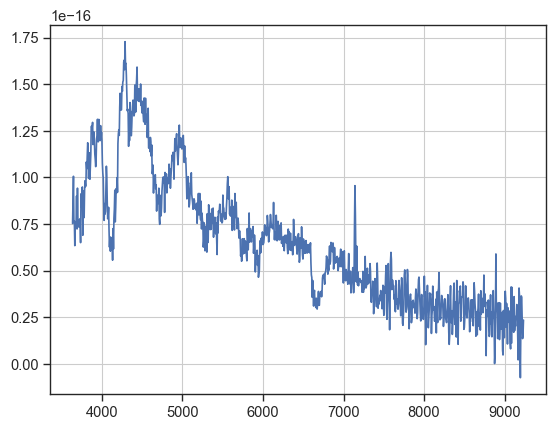

In [11]:
x = df.to_numpy()[:, 0]
y1 = df.to_numpy()[:, 1]
# y2 = df.to_pandas().to_numpy()[:, 2]

plt.plot(x,y1)

### 3.2. Random spectra

In [16]:
# fn = p60df.sample(n=1)["Ascii file"].values[0]
fn = spectra_info.sample(n=1)["Ascii file"].values[0]
fn = "SN2025cku_2025-02-27_10-53-27_P60_SEDM_TNS.ascii"
print(fn)
df = sidhelpers.read_spectra(
    f"../1. download ALL wise data/wiserep_data/spectra/{fn}",
)
df

SN2025cku_2025-02-27_10-53-27_P60_SEDM_TNS.ascii


,col1,col2,col3
0,3776.7,9.093000e-17,6.201000e-31
1,3802.3,-4.808000e-17,4.872000e-31
2,3827.9,-2.715000e-16,2.627000e-31
3,3853.4,-7.058000e-16,1.168000e-33
4,3879.0,1.666000e-16,1.148000e-33
...,...,...,...
209,9121.0,9.326000e-17,4.787000e-34
210,9146.6,1.019000e-16,5.096000e-34
211,9172.1,1.068000e-16,3.742000e-34
212,9197.7,1.089000e-16,8.871000e-34


In [17]:
x = df.to_numpy()[:, 0]
y1 = df.to_numpy()[:, 1]
# y2 = df.to_pandas().to_numpy()[:, 2]

In [18]:
x[y1.argmax()]

np.float64(4364.8)

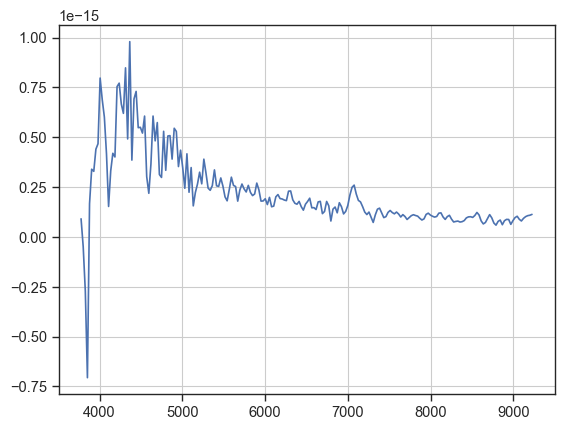

In [19]:
plt.plot(x, y1, label="y1")


In [24]:
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6), sharex=True)

# # Plot y1 in the first subplot
# ax1.plot(x, y1, label="y1")
# ax1.legend()

# # Plot y2 in the second subplot
# ax2.plot(x, y2, label="y2", color="orange")
# ax2.set_xlabel("Wavelength")
# ax2.legend()

# plt.suptitle(fn)
# plt.tight_layout()
# plt.show()